# Pandas 

## contenido
- Fundamentos y E/S
- Selección, filtrado e indexación 
- Limpieza y preparación de datos 
- Transformaciones y funciones
- Agrupaciones, pivotes y ventanas 
- Joins, concat y reshaping 
- Series de tiempo 
- Texto y categóricos
- Rendimiento y depuración
- Visualización con Matplotlib 

[Cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

# importaciones

In [60]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# rutas

In [2]:
np.random.seed(42)
data_dir = Path('static/data/')
data_dir.mkdir(parents=True, exist_ok=True)

# Fundamentos y E/S

### Crear Series y DataFrames

![Serie](static/img/serie.png) ![DataFrame](static/img/dataframe.png) 

In [3]:
s = ["x","y","z"]
series = pd.Series(s, name="S")
print(series)

0    x
1    y
2    z
Name: S, dtype: object


In [4]:
a = [1,2,3]
b = ["x","y","z"]
df = pd.DataFrame({"A":a, "B":b})
print(df)

   A  B
0  1  x
1  2  y
2  3  z


### Lectura

In [5]:
# ruta
ruta_csv = "static/csv/winemag-data_first150k.csv"
# variable
#lectura de csv
df_csv = pd.read_csv(ruta_csv,delimiter=",")
df_csv.head()
#lectura de excel
#ruta_excel = "static/excel/mi_excel.xlsx"
#df_excel = pd.read_excel(ruta_excel, sheet_name="Hoja1")
#LECTURA DE JSON
# ruta_json = "static/json/mi_json.json"  
# df_json = pd.read_json(ruta_json)
#LECTURA DE HTML
# ruta_html = "static/html/mi_html.html"
# df_html = pd.read_html(ruta_html)
#LECTURA DE PARQUET
# ruta_parquet = "static/parquet/mi_parquet.parquet"    
# df_parquet = pd.read_parquet(ruta_parquet)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


### Selección de columnas

In [6]:
columnas = ['country', 'designation', 'points', 'price', 'province', 'region_1','region_2', 'variety', 'winery', 'last_year_points']
columnas

['country',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'variety',
 'winery',
 'last_year_points']

In [7]:
columnas_filtradas = ['country', 'designation', 'price']
df_csv['country'].head(2)

0       US
1    Spain
Name: country, dtype: object

In [8]:
columnas_filtradas = ['country', 'designation', 'price']
df_csv[columnas_filtradas].head(2)
#df_2 =df_csv[columnas_filtradas].head(2)

,country,designation,price
0,US,Martha's Vineyard,235.0
1,Spain,Carodorum Selección Especial Reserva,110.0


### Información general dataframe

In [9]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [10]:
df_csv.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


### Tipos de Conversion

In [11]:
len(df_csv)

150930

In [12]:
df_csv["date_f"]= np.random.choice(pd.date_range("2025-01-01", "2025-12-31"), size=len(df_csv))
df_csv["date_f"].head(2)

0   2025-04-13
1   2025-12-15
Name: date_f, dtype: datetime64[ns]

In [13]:
df_fecha = pd.DataFrame()
df_fecha["fecha"] = pd.to_datetime(df_csv["date_f"], format="%Y-%m-%d")
#df_fecha["fecha"] = pd.to_datetime(df_csv["date_f"], format="%Y-%m-%d")
df_fecha["fecha"].head(2)

0   2025-04-13
1   2025-12-15
Name: fecha, dtype: datetime64[ns]

In [14]:
df_fecha.min()

fecha   2025-01-01
dtype: datetime64[ns]

In [15]:
df_fecha.max()

fecha   2025-12-31
dtype: datetime64[ns]

### Guardado de subconjunto

In [16]:
df_fecha["fecha2"] = pd.to_datetime(df_csv["date_f"], format="%Y-%m-%d").copy()

In [17]:
df_fecha[df_fecha["fecha2"] > "2025-08-31"].copy()

,fecha,fecha2
1,2025-12-15,2025-12-15
2,2025-09-28,2025-09-28
10,2025-11-27,2025-11-27
13,2025-12-26,2025-12-26
17,2025-11-05,2025-11-05
...,...,...
150915,2025-09-22,2025-09-22
150916,2025-09-08,2025-09-08
150919,2025-10-28,2025-10-28
150920,2025-09-28,2025-09-28


### Creación de indice

In [18]:
# definir la columna fecha como indice
indices =   df_fecha.set_index("fecha").copy()
print(indices.head(2))
# crear indice general
indices2 = df_fecha.reset_index().copy()
print(indices2.head(2))

               fecha2
fecha                
2025-04-13 2025-04-13
2025-12-15 2025-12-15
   index      fecha     fecha2
0      0 2025-04-13 2025-04-13
1      1 2025-12-15 2025-12-15


### valores unicos

In [19]:
indices2["fecha"].nunique()

365

### Ordenar

In [20]:
indices2.sort_values(by="fecha", ascending=True).head(10)

,index,fecha,fecha2
149131,149131,2025-01-01,2025-01-01
22318,22318,2025-01-01,2025-01-01
20391,20391,2025-01-01,2025-01-01
50579,50579,2025-01-01,2025-01-01
57445,57445,2025-01-01,2025-01-01
114318,114318,2025-01-01,2025-01-01
46874,46874,2025-01-01,2025-01-01
36857,36857,2025-01-01,2025-01-01
91758,91758,2025-01-01,2025-01-01
92985,92985,2025-01-01,2025-01-01


# Selección, filtrado e indexación 

### loc / iloc

In [21]:
df_fecha.loc[500:, ["fecha"]]

,fecha
500,2025-09-04
501,2025-09-15
502,2025-06-09
503,2025-12-06
504,2025-06-01
...,...
150925,2025-04-20
150926,2025-04-17
150927,2025-04-26
150928,2025-01-27


In [22]:
df_fecha.reset_index()

,index,fecha,fecha2
0,0,2025-04-13,2025-04-13
1,1,2025-12-15,2025-12-15
2,2,2025-09-28,2025-09-28
3,3,2025-04-17,2025-04-17
4,4,2025-03-13,2025-03-13
...,...,...,...
150925,150925,2025-04-20,2025-04-20
150926,150926,2025-04-17,2025-04-17
150927,150927,2025-04-26,2025-04-26
150928,150928,2025-01-27,2025-01-27


In [23]:
df_csv.iloc[3:5, 0:2]

,Unnamed: 0,country
3,3,US
4,4,France


### filtrado por condiciones

In [24]:
df_csv.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery',
       'date_f'],
      dtype='object')

In [25]:
df_csv[(df_csv['date_f'] == "2025-10-31 00:00:00") & (df_csv['points'] > 90)].head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,date_f
75,75,US,An elegant blend from different estate vineyar...,Premier Cuvée,91,54.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Archery Summit,2025-10-31
273,273,US,"From the estimable Shake Ridge Ranch, winemake...",Suzuri Series Shake Ridge Ranch,92,50.0,California,Amador County,Sierra Foothills,Rhône-style Red Blend,Gallica,2025-10-31
301,301,US,"Entirely estate grown from dry-farmed grapes, ...",Estate Bottled,94,30.0,California,Napa Valley,Napa,Riesling,Smith-Madrone,2025-10-31
323,323,Spain,Ripe pure black-fruit aromas are touched up by...,Prestigio Pago de las Solanas,94,NaN,Northern Spain,Ribera del Duero,NaN,Red Blend,Matarromera,2025-10-31
7647,7647,US,This reserved and classically styled wine has ...,Dach Vineyard,91,55.0,California,Anderson Valley,Mendocino/Lake Counties,Chardonnay,Domaine Anderson,2025-10-31


### filtrado por multiplex condiciones

In [26]:
df_csv[(df_csv['price'].isin([10,50])) & (df_csv['points'].between(75,95))].head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,date_f
48,48,Italy,"Ripe dark-skinned berry, forest floor and cook...",NaN,90,50.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Brunelli Martoccia,2025-03-30
68,68,US,"Big, bold, dark and chewy, this builds upon su...",Schindler Vineyard,91,50.0,Oregon,Eola-Amity Hills,Willamette Valley,Pinot Noir,Panther Creek,2025-07-10
89,89,US,A red Meritage driven by 73% Cabernet Sauvigno...,Magnificat,91,50.0,California,Napa Valley,Napa,Meritage,Franciscan,2025-07-07
90,90,US,"Bright, light oak shadings dress up this mediu...",NaN,86,10.0,California,California,California Other,Cabernet Sauvignon,Belle Ambiance,2025-02-10
94,94,Portugal,This family-owned estate has produced an immed...,Muros de Vinha,86,10.0,Douro,NaN,NaN,Portuguese Red,Quinta do Portal,2025-03-06


### isin

In [27]:
df_csv['price'].isin([10,50]).head(2)

0    False
1    False
Name: price, dtype: bool

### BETWEEN 

In [28]:
(df_csv['points'].between(75,95)).head(5) # QUERY

0    False
1    False
2    False
3    False
4     True
Name: points, dtype: bool

### QUERY

In [29]:
((df_csv['points'] >= 75) & (df_csv['points'] <= 95)).head(5)

0    False
1    False
2    False
3    False
4     True
Name: points, dtype: bool

### top-k por grupo

In [30]:
df_csv.sort_values('price', ascending= True).groupby('country').head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,date_f
126595,126595,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,Merlot,Bandit,2025-01-14
34415,34415,Spain,This opens with standard cherry and berry arom...,NaN,84,4.0,Levante,Yecla,NaN,Cabernet Sauvignon,Terrenal,2025-02-18
48655,48655,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,Merlot,Bandit,2025-04-22
73417,73417,Romania,Notes of sun-dried hay and green flower highli...,UnWineD,86,4.0,Viile Timisului,NaN,NaN,Pinot Grigio,Cramele Recas,2025-03-02
114167,114167,US,"Easy, simple peach and strawberry flavors are ...",White Zinfandel,83,4.0,California,California,California Other,Zinfandel,Round Hill,2025-11-22
...,...,...,...,...,...,...,...,...,...,...,...,...
118982,118982,Egypt,"Ripe pear, apple and tropical fruit in the nos...",Caspar Blanc de Noirs,84,NaN,Egypt,NaN,NaN,Grenache,Sahara Vineyards,2025-02-05
119008,119008,Egypt,"This fresh, approachable Chenin starts with br...",Caspar,84,NaN,Egypt,NaN,NaN,Chenin Blanc,Sahara Vineyards,2025-07-23
119894,119894,Egypt,"The character of this feminine, aromatic Viogn...",NaN,83,NaN,Egypt,NaN,NaN,Viognier,Sahara Vineyards,2025-04-03
138139,138139,Tunisia,An irresistible rosé from Tunisia (made by Sic...,Selian Mystère,87,NaN,Tunisia,NaN,NaN,Rosé,Domaine Neferis,2025-05-07


### muestra aleatoria

In [31]:
df_csv.sample(frac=0.02, random_state=42)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,date_f
82957,82957,Argentina,"A cool cherry aroma and a mild, creamy paste n...",Colección,84,10.0,Mendoza Province,Mendoza,NaN,Malbec,Finca Los Maza,2025-11-24
60768,60768,Germany,This lightweight Pinot could use a larger help...,NaN,81,18.0,Baden,NaN,NaN,Pinot Noir,Fischer,2025-11-05
63047,63047,US,Pure Syrah from a great lineup of vineyards. I...,NaN,93,42.0,Washington,Columbia Valley (WA),Columbia Valley,Syrah,Basel Cellars,2025-11-11
71004,71004,Chile,Heavy aromas of horse stable and compost give ...,Tribute,81,17.0,Colchagua Valley,NaN,NaN,Shiraz,Caliterra,2025-08-15
78169,78169,US,"The is dry and well balanced, with red licoric...",Reserve,88,35.0,California,Paso Robles,Central Coast,Pinot Noir,Cerro Prieto,2025-05-17
...,...,...,...,...,...,...,...,...,...,...,...,...
19240,19240,US,This young wine has not come into focus; it fe...,Jubilee Vineyard,83,28.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Artisanal Wine Cellars,2025-06-02
18871,18871,Argentina,"Dark, rubbery aromas lead to a simple, sweet, ...",NaN,85,NaN,Other,Neuquén,NaN,Malbec,Ruta 22,2025-07-19
83756,83756,Argentina,"Smells like corn and a burning hay field, and ...",Alto Las Tacas,81,10.0,Mendoza Province,Mendoza,NaN,Torrontés,Bodega Vistandes,2025-01-08
131557,131557,France,"With superripe fruit, fat and glossy, with ric...",Vaillons Premier Cru,88,30.0,Burgundy,Chablis,NaN,Chardonnay,Simonnet-Febvre,2025-11-27


### Manejo de duplicados

In [32]:
df_duplicados = df_csv.duplicated(subset=["province","region_1"])
df_duplicados.shape

(150930,)

In [33]:
noduplicados = df_csv[~df_duplicados].copy()
noduplicados.shape

(1634, 12)

### Reindices

In [34]:
rango =range(10)
print(rango)

range(0, 10)


In [35]:
province = noduplicados[["province"]].copy()
pro2 = province.reindex(range(len(province)+7))
pro2

,province
0,California
1,Northern Spain
2,California
3,Oregon
4,Provence
...,...
1636,NaN
1637,NaN
1638,NaN
1639,NaN


In [36]:
len(province)

1634

### rellenado fill

In [37]:
pro2["province"] = pro2["province"].ffill()
pro2.tail(5)

,province
1636,California
1637,California
1638,California
1639,California
1640,California


## Limpieza y preparación de datos 

### Valores perdidos

In [38]:
#df_limpieza.columns

In [39]:
df_limpieza = df_csv.copy()
idx = df_limpieza.sample(frac=0.05, random_state=42).index
idx

Index([ 82957,  60768,  63047,  71004,  78169,  43160,  15346,    378,   2800,
        33072,
       ...
        39439,  26031, 107671,  29945,  88085,   6098,  70450,  40216,  84519,
        16759],
      dtype='int64', length=7546)

In [40]:
df_limpieza.loc[idx,"price"] = np.nan
df_limpieza.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,date_f
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,2025-04-13
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,2025-12-15


In [41]:
df_limpieza["price"] = df_limpieza.groupby("province")["price"].transform(lambda s : s.fillna(s.median()))
df_limpieza["price"].isna().sum() 


/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1

np.int64(34)

### Outliers (IQR)
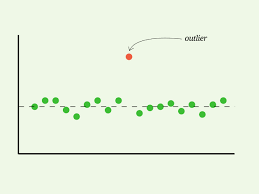

In [42]:
q1 = df_limpieza["price"].quantile(0.25)
q1

np.float64(16.0)

In [43]:
q3 = df_limpieza["price"].quantile(0.75)
q3

np.float64(37.0)

In [44]:
iqr = q3-q1
iqr

np.float64(21.0)

In [45]:
debajo, encima = (q1 - 1.5*iqr), (q3 + 1.5*iqr)
debajo, encima

(np.float64(-15.5), np.float64(68.5))

In [46]:
df_limpieza = df_csv.copy()
df_limpieza["price_outlier"] = df_limpieza["price"].clip(lower=df_limpieza["price"].quantile(0.01),upper=df_limpieza["price"].quantile(0.99))
df_limpieza[["price","price_outlier"]].describe()

,price,price_outlier
count,137235.000000,137235.000000
mean,33.131482,31.954735
std,36.322536,24.953382
min,4.000000,8.000000
25%,16.000000,16.000000
50%,24.000000,24.000000
75%,40.000000,40.000000
max,2300.000000,150.000000


### Normalizacion o Estandarizacion

In [47]:
df_limpieza = df_csv.copy()
sc = MinMaxScaler()
df_limpieza["price_minmax"] = sc.fit_transform(df_limpieza[["price"]])
df_limpieza["price_z"] = (df_limpieza["price"]-df_limpieza["price"].mean())/df_limpieza["price"].std()
df_limpieza[["price","price_minmax","price_z"]].head(5)

,price,price_minmax,price_z
0,235.0,0.100610,5.557666
1,110.0,0.046167,2.116276
2,90.0,0.037456,1.565654
3,65.0,0.026568,0.877376
4,66.0,0.027003,0.904907


### Parseo de fechas

In [48]:
df_limpieza = df_csv.copy()
#date_f
df_limpieza["year"]= df_limpieza["date_f"].dt.year
df_limpieza["year"].head(2)

0    2025
1    2025
Name: year, dtype: int32

In [49]:
df_limpieza["month"]= df_limpieza["date_f"].dt.month
df_limpieza["month"].head(2)

0     4
1    12
Name: month, dtype: int32

In [50]:
df_limpieza["day"]= df_limpieza["date_f"].dt.day
df_limpieza["day"].head(2)

0    13
1    15
Name: day, dtype: int32

In [51]:
df_limpieza[["date_f","year","month","day"]].head(5)

,date_f,year,month,day
0,2025-04-13,2025,4,13
1,2025-12-15,2025,12,15
2,2025-09-28,2025,9,28
3,2025-04-17,2025,4,17
4,2025-03-13,2025,3,13


### Renombrado de columnas

In [52]:
df_limpieza = df_csv.copy()
df_limpieza.columns = df_limpieza.columns.str.lower().str.replace("_","")
df_limpieza.columns

Index(['unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region1', 'region2', 'variety', 'winery',
       'datef'],
      dtype='object')

### Eliminar columnas o filas

In [53]:
df_limpieza = df_csv.copy()
df_limpieza = df_limpieza.drop(columns=["country"]).query("price > 7 and price < 151")
len(df_limpieza)

134716

In [54]:
df_limpieza["price"].describe()

count    134716.000000
mean         30.988093
std          22.125831
min           8.000000
25%          16.000000
50%          24.000000
75%          40.000000
max         150.000000
Name: price, dtype: float64

### validaciones

In [55]:
x = 10
assert x > 0, "x debe ser mayor que 0"   # ✅ no pasa nada
assert x < 5, "x debe ser menor que 5"   # ❌ lanza AssertionError

AssertionError: x debe ser menor que 5

In [ ]:
df_limpieza = df_csv.copy()
(df_limpieza["price"] > 3000)

0         False
1         False
2         False
3         False
4         False
          ...  
150925    False
150926    False
150927    False
150928    False
150929    False
Name: price, Length: 150930, dtype: bool

In [ ]:
df_limpieza = df_csv.copy()
assert (df_limpieza["price"] > 3000).all(), "price es outlier por encima "
assert (df_limpieza["price"] > 8).all(), "price es outlier por debajo "
"el precio esta ok"

AssertionError: price es outlier por encima 

# Transformaciones y funciones

### apply / map / applymap
- map: pensado para Series (columna o fila).
- apply: funciona en Series y DataFrames, más flexible.
- applymap: exclusivo de DataFrames, aplica una función elemento a elemento.

Funcion

In [ ]:
df_limpieza = df_csv.copy()
df_limpieza.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery',
       'date_f'],
      dtype='object')

In [ ]:

(df_limpieza
 .assign(fecha=lambda d: pd.to_datetime(d['date_f']),
         anio=lambda d: d['date_f'].dt.year,
         total_log=lambda d: np.log1p(d['price']))
 .head(3))


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,date_f,fecha,anio,total_log
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,2025-04-13,2025-04-13,2025,5.463832
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,2025-12-15,2025-12-15,2025,4.709530
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,2025-09-28,2025-09-28,2025,4.510860


In [ ]:
df_limpieza = df_csv.copy()
df_limpieza['precio_red'] = df_limpieza['price'].apply(lambda x: round(x, 0))
tramos = df_limpieza['price'].quantile([0.33, 0.66]).to_list()
tramos


[18.0, 32.0]

In [ ]:
def etiqueta(t):
    if t <= tramos[0]: return 'bajo' # 18 
    if t <= tramos[1]: return 'medio'
    return 'alto'

In [ ]:
df_limpieza["tramo_total"]= df_limpieza["price"].map(etiqueta)
df_limpieza[["price","precio_red","tramo_total"]]


,price,precio_red,tramo_total
0,235.0,235.0,alto
1,110.0,110.0,alto
2,90.0,90.0,alto
3,65.0,65.0,alto
4,66.0,66.0,alto
...,...,...,...
150925,20.0,20.0,medio
150926,27.0,27.0,medio
150927,20.0,20.0,medio
150928,52.0,52.0,alto


### where / mask

- where: mantiene los valores que cumplen la condición, y reemplaza el resto.
- mask: reemplaza los valores que cumplen la condición, y mantiene los demás.

In [ ]:
df_limpieza = df_csv.copy()
df_limpieza["total_desc"] = df_limpieza["price"].where(df_limpieza["price"]<tramos[1],df_limpieza["price"]*0.05)
df_limpieza[["price","total_desc"]]

,price,total_desc
0,235.0,11.75
1,110.0,5.50
2,90.0,4.50
3,65.0,3.25
4,66.0,3.30
...,...,...
150925,20.0,20.00
150926,27.0,27.00
150927,20.0,20.00
150928,52.0,2.60


### Explode

- explode es un método de pandas que toma una columna con elementos iterables (listas, tuplas, sets) y “despliega” cada elemento en una fila independiente, replicando los valores de las demás columnas.

- Aplica sobre Series o columnas de un DataFrame.

In [ ]:
df_limpieza = df_csv.copy()
id,lista = [1,2,3],[["a","b"],["b","c","d"],["x"]]
df_temp = pd.DataFrame({"id":id,"lista":lista})
df_temp.explode("lista")

,id,lista
0,1,a
0,1,b
1,2,b
1,2,c
1,2,d
2,3,x


### Pivot y melt
- pivot_table: método de pandas para crear tablas dinámicas (similar a Excel), resumir y reorganizar datos mediante agregaciones.
- melt: método para transformar un DataFrame de formato ancho (wide) a formato largo (long), descomponiendo columnas en filas.

In [ ]:
df_limpieza = df_csv.copy()
df_limpieza.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery',
       'date_f'],
      dtype='object')

In [ ]:

pivot_df = df_limpieza.pivot_table(index="date_f",columns="country",aggfunc="sum")
pivot_df.head(3)

Unnamed: 0                                                         \
country       Albania  Argentina  Australia   Austria Bosnia and Herzegovina   
date_f                                                                         
2025-01-01        NaN  1767920.0  2032672.0  286392.0                    NaN   
2025-01-02        NaN  1199403.0   989714.0  489528.0                    NaN   
2025-01-03        NaN  1876499.0  1376149.0  550571.0                    NaN   

                                                        ...  \
country      Brazil Bulgaria   Canada      Chile China  ...   
date_f                                                  ...   
2025-01-01      NaN      NaN      NaN   953332.0   NaN  ...   
2025-01-02  75533.0      NaN      NaN  1201865.0   NaN  ...   
2025-01-03      NaN      NaN  29020.0   838730.0   NaN  ...   

                                                       winery              \
country                                          South Africa South Korea   
date_f                                                                      
2025-01-01                                           Ataraxia         NaN   
2025-01-02  Pecan StreamSpringfield EstateDe TorenWildekra...         NaN   
2025-01-03  EssayVrede en LustBuitenverwachtingBouchard Fi...         NaN   

                                                                           \
country                                                 Spain Switzerland   
date_f                                                                      
2025-01-01  Portal del MontsantSeis de Azul y GaranzaFinca...         NaN   
2025-01-02  CampiñaMontgóBodegas ValdemarAlidisBodegas Pir...         NaN   
2025-01-03  V&N; CellarsElias MoraPago del VostalMasies d'...         NaN   

                                                                              \
country    Tunisia Turkey                                                 US   
date_f                                                                         
2025-01-01     NaN    NaN  AuspicionMcIntyre VineyardsPeter Paul WinesDr....   
2025-01-02     NaN    NaN  Dussek Family CellarsOso LibreDecoyPietra Sant...   
2025-01-03     NaN    NaN  Arbor CrestBergströmHoveyBranderMounts14 Hands...   

                                                          
country    US-France    Ukraine                  Uruguay  
date_f                                                    
2025-01-01       NaN        NaN                      NaN  
2025-01-02       NaN  Artemovsk  Establecimiento Juanico  
2025-01-03       NaN        NaN                      NaN  

[3 rows x 480 columns]

In [ ]:
df_long = df_limpieza.reset_index().melt(id_vars="date_f",var_name="country")
df_long.head()

,date_f,country,value
0,2025-04-13,index,0
1,2025-12-15,index,1
2,2025-09-28,index,2
3,2025-04-17,index,3
4,2025-03-13,index,4


### rank
- rank es un método de pandas que asigna un rango numérico a cada valor de una Serie o DataFrame, en función de su posición relativa.

In [ ]:
df_limpieza = df_csv.copy()
df_limpieza["rank_country"]= df_limpieza.groupby("country")["price"].rank(ascending=False,method="dense")
df_limpieza[["country","rank_country"]].head()

,country,rank_country
0,US,14.0
1,Spain,75.0
2,US,64.0
3,US,88.0
4,France,232.0


# Agrupaciones, pivotes y ventanas

### groupby básico

In [ ]:
df_limpieza = df_csv.copy()
df_limpieza.groupby(["country","points"])["price"].agg(["sum","mean"]).head()

sum       mean
country   points                   
Albania   88        40.0  20.000000
Argentina 80      1967.0  12.940789
          81      2854.0  12.741071
          82      3814.0  12.713333
          83      7866.0  13.446154

# Visualización con Matplotlib

In [57]:
df_maplot = df_csv.copy()

In [59]:
df_maplot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   150930 non-null  int64         
 1   country      150925 non-null  object        
 2   description  150930 non-null  object        
 3   designation  105195 non-null  object        
 4   points       150930 non-null  int64         
 5   price        137235 non-null  float64       
 6   province     150925 non-null  object        
 7   region_1     125870 non-null  object        
 8   region_2     60953 non-null   object        
 9   variety      150930 non-null  object        
 10  winery       150930 non-null  object        
 11  date_f       150930 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 13.8+ MB


### diagrama de discpercion price vs points

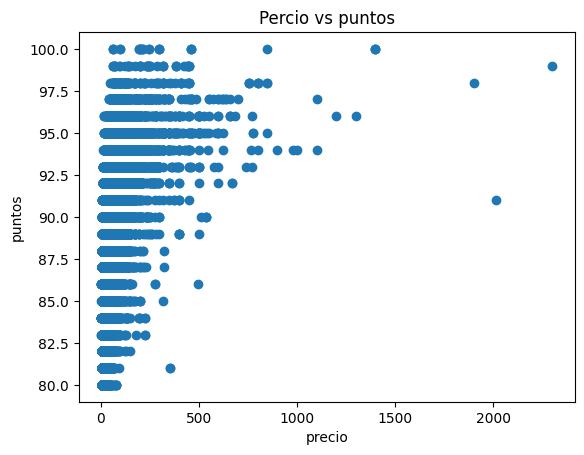

In [64]:
plt.figure()
price = df_maplot["price"]
point = df_maplot["points"]
#print(price,point)
plt.scatter(price,point)
plt.title("Percio vs puntos")
plt.xlabel("precio")
plt.ylabel("puntos")
plt.show()

### Histograma de precios

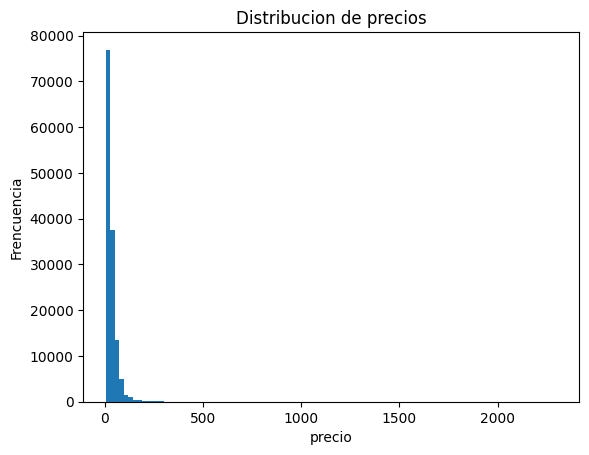

In [74]:
plt.figure()
df_maplot["price"].dropna().plot(kind="hist",bins=100)
plt.title("Distribucion de precios")
plt.xlabel("precio")
plt.ylabel("Frencuencia")
plt.show()

### Boxplot del precio por pais

In [83]:
ciudades = df_maplot[["country","price"]].head(10)
ciudades

,country,price
0,US,235.0
1,Spain,110.0
2,US,90.0
3,US,65.0
4,France,66.0
5,Spain,73.0
6,Spain,65.0
7,Spain,110.0
8,US,65.0
9,US,60.0


<Figure size 640x480 with 0 Axes>

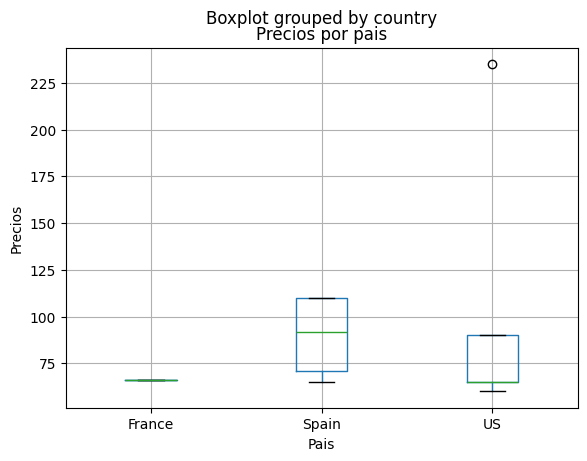

In [85]:
ciudades = df_maplot[["country","price"]].head(10)
plt.figure()
ciudades.boxplot(column="price",by="country")
plt.title("Precios por pais")
plt.xlabel("Pais")
plt.ylabel("Precios")
plt.show()

### grafico de barras Variedades mas frecuentes

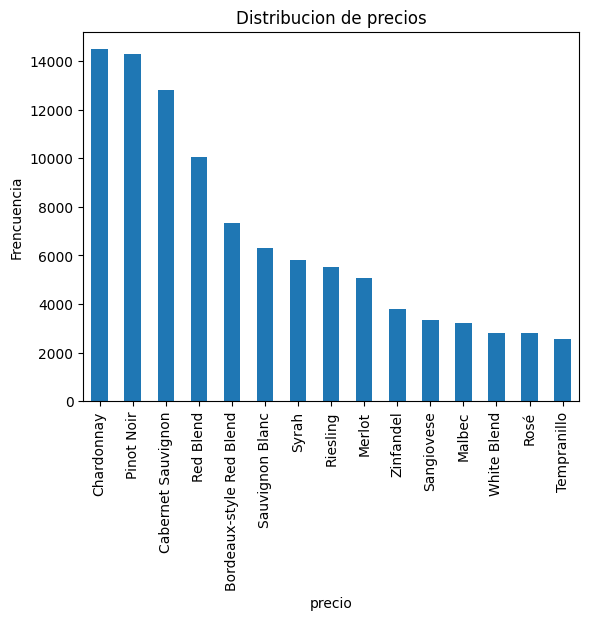

In [77]:
cantidad = df_maplot["variety"].value_counts().head(15)
plt.figure()
cantidad.plot(kind="bar")
plt.title("Distribucion de precios")
plt.xlabel("precio")
plt.ylabel("Frencuencia")
plt.show()

### Descripcion de palabras comunes (top 15)

In [100]:
#df_maplot.shape[1]
len(df_maplot)

150930

In [86]:
df_maplot["description"]

0         This tremendous 100% varietal wine hails from ...
1         Ripe aromas of fig, blackberry and cassis are ...
2         Mac Watson honors the memory of a wine once ma...
3         This spent 20 months in 30% new French oak, an...
4         This is the top wine from La Bégude, named aft...
                                ...                        
150925    Many people feel Fiano represents southern Ita...
150926    Offers an intriguing nose with ginger, lime an...
150927    This classic example comes from a cru vineyard...
150928    A perfect salmon shade, with scents of peaches...
150929    More Pinot Grigios should taste like this. A r...
Name: description, Length: 150930, dtype: object

In [ ]:
import re
from collections import Counter

In [88]:
def tokenize(text):
    if pd.isna(text):
        return []
    tokens = re.findall(r"[A-Za-zÀ-ÿ]+",text.lower())
    stop = set(["the", "a", "of", "and", "in", "to", "for","be", "have", "do", "say", "get", "make", "go", "you", "he", "she", "it", "we", "they"])
    return [t for t in tokens if t not in stop and len(t) > 2]

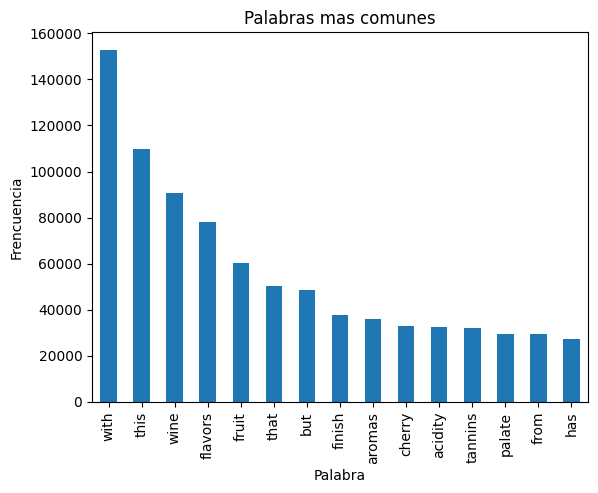

In [89]:
todas_palabras = Counter()
df_maplot["description"].dropna().apply(lambda x: todas_palabras.update(tokenize(x)))
letras = pd.Series(dict(todas_palabras.most_common(15)))
plt.figure()
letras.plot(kind="bar")
plt.title("Palabras mas comunes")
plt.xlabel("Palabra")
plt.ylabel("Frencuencia")
plt.show()

### Puntos promedio por pais

In [92]:
#pivot_table
pivot = pd.pivot_table(df_maplot,values="points",index="country",columns="variety",aggfunc="mean")
pivot

variety,Agiorgitiko,Aglianico,Aidani,Airen,Albana,Albariño,Albarossa,Albarín,Aleatico,Alfrocheiro,...,Xynisteri,Yapincak,Zelen,Zibibbo,Zierfandler,Zierfandler-Rotgipfler,Zinfandel,Zlahtina,Zweigelt,Žilavka
country,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,88.200000,NaN,NaN,NaN
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,91.363636,90.333333,NaN,NaN,87.320755,NaN
Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,NaN,NaN,NaN


### Mapa de calor de correlaciones

In [108]:
correcion = df_maplot[["points","price"]].corr()
correcion 

,points,price
points,1.000000,0.459863
price,0.459863,1.000000


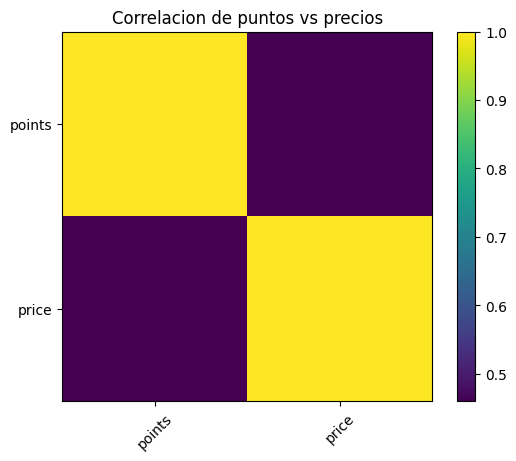

In [110]:

plt.figure()
plt.imshow(correcion,interpolation="nearest")
plt.xticks(range(correcion.shape[1]),correcion.columns,rotation=45)
plt.yticks(range(correcion.shape[0]),correcion.index)
plt.colorbar()
plt.title("Correlacion de puntos vs precios")

plt.show()

### precio promedio por variedad top 8

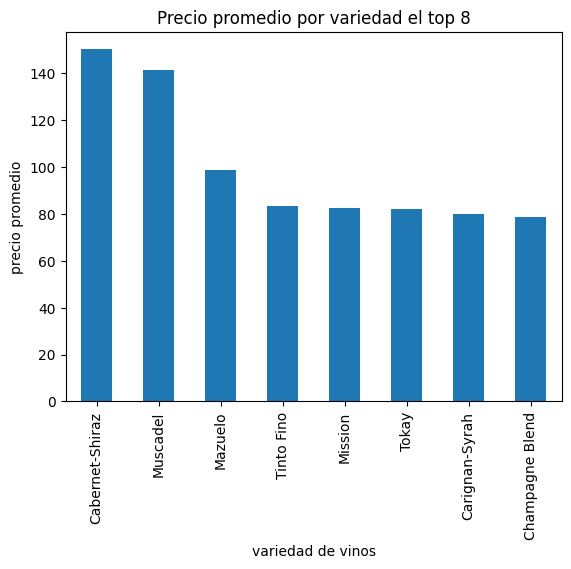

In [112]:
precio_prom = df_maplot.groupby("variety")["price"].mean().sort_values(ascending=False).head(8)
plt.figure()
precio_prom.plot(kind="bar")
plt.title("Precio promedio por variedad el top 8")
plt.xlabel("variedad de vinos")
plt.ylabel("precio promedio")
plt.show()